In [22]:
from scipy import stats
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

In [41]:
#percentage of snps high impact and between MAF brakets
#inversion_snps, total_outside
def get_counts(level, mytype,cname):

    file_path = os.path.expanduser(f'{level}_{cname}_snpeff_freq.txt.frq')
    df1 = pd.read_csv(file_path, delimiter='\t')  # Use delimiter='\t' if the file is tab-separated
    df1[['ref', 'AF1']] = df1['N_CHR'].str.split(':', expand=True)
    df1[['alt', 'AF2']] = df1['{ALLELE:FREQ}'].str.split(':', expand=True)
    df1['MAF'] = df1[['AF1', 'AF2']].min(axis=1)
    df1['MAF'] = df1['MAF'].astype(float)

    file_path = os.path.expanduser(f'{level}_{cname}_inv_snpeff_freq.txt.frq')
    df2 = pd.read_csv(file_path, delimiter='\t')
    df2[['ref', 'AF1']] = df2['N_CHR'].str.split(':', expand=True)
    df2[['alt', 'AF2']] = df2['{ALLELE:FREQ}'].str.split(':', expand=True)
    df2['MAF'] = df2[['AF1', 'AF2']].min(axis=1)
    df2['MAF'] = df2['MAF'].astype(float)
    #print(len(df1), len(df2))

    #take out inversion from background
    df_diff = df1.merge(df2, how='left', indicator=True)
    df1 = df_diff[df_diff['_merge'] == 'left_only'].drop(columns=['_merge'])

    counts = []
    if mytype == "all":
        counts.append(len(df1[df1["MAF"]<0.1]))
        counts.append(len(df1[(df1["MAF"]<0.2) & (df1["MAF"]>=0.1)]))
        counts.append(len(df1[(df1["MAF"]<0.3) & (df1["MAF"]>=0.2)]))
        counts.append(len(df1[(df1["MAF"]<0.4) & (df1["MAF"]>=0.3)]))
        counts.append(len(df1[(df1["MAF"]<0.5) & (df1["MAF"]>=0.4)]))
    else:
        counts.append(len(df2[df2["MAF"]<0.1]))
        counts.append(len(df2[(df2["MAF"]<0.2) & (df2["MAF"]>=0.1)]))
        counts.append(len(df2[(df2["MAF"]<0.3) & (df2["MAF"]>=0.2)]))
        counts.append(len(df2[(df2["MAF"]<0.4) & (df2["MAF"]>=0.3)]))
        counts.append(len(df2[(df2["MAF"]<0.5) & (df2["MAF"]>=0.4)]))

    return counts, df1, df2

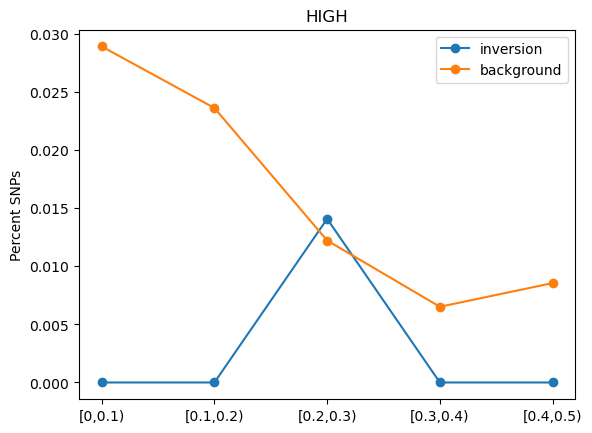

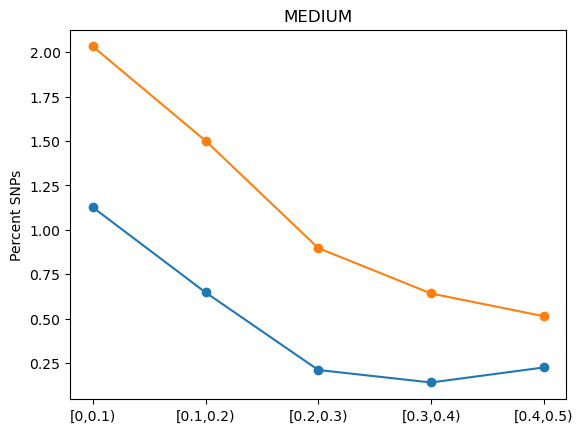

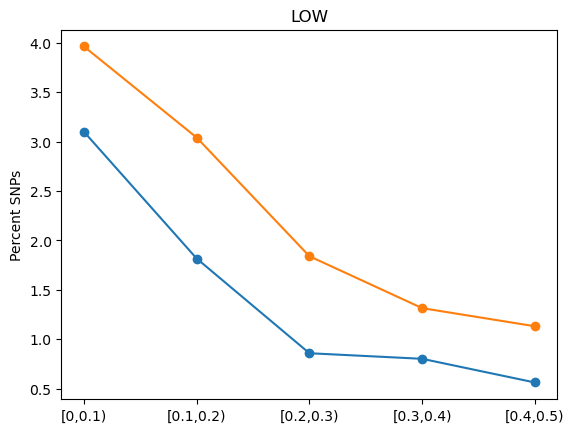

In [48]:
cname="610"
high_inv, _, _ = get_counts("high", "inv",cname)
medium_inv, _, _ = get_counts("mod", "inv",cname)
low_inv, _, _ = get_counts("low", "inv",cname)
high_out, _, _ = get_counts("high", "all",cname)
medium_out, _, _ = get_counts("mod", "all",cname)
low_out, _, _ = get_counts("low", "all",cname)

value_labels = ["[0,0.1)","[0.1,0.2)","[0.2,0.3)","[0.3,0.4)","[0.4,0.5)"]

df=pd.read_csv(f"{cname}.csv", header=None)
df_inv=pd.read_csv(f"{cname}_inv.csv", header=None)

total_snps = int(df.iloc[0][0])
inversion_snps = int(df_inv.iloc[0][0])
total_outside = total_snps - inversion_snps

total_intergenic = int(df.iloc[-1][0])
inversion_intergenic = int(df_inv.iloc[-1][0])
outside_intergenic = total_intergenic - inversion_intergenic

total_outside = total_outside - outside_intergenic
inversion_snps = inversion_snps - inversion_intergenic

values_total = np.array(df.iloc[1:7][0].tolist()).astype(int)
values_inverted = np.array(df_inv.iloc[1:7][0].tolist()).astype(int)
values_outside = values_total - values_inverted

plt.plot(list(range(len(high_inv))),np.array(high_inv)/inversion_snps*100, marker="o",label="inversion")
plt.plot(list(range(len(high_inv))),np.array(high_out)/total_outside*100, marker="o",label="background")
plt.xticks(list(range(len(high_inv))), value_labels)
plt.title("HIGH")
plt.ylabel("Percent SNPs")
plt.legend()
plt.show()
plt.plot(list(range(len(high_inv))),np.array(medium_inv)/inversion_snps*100, marker="o",label="inversion")
plt.plot(list(range(len(high_inv))),np.array(medium_out)/total_outside*100, marker="o",label="background")
plt.xticks(list(range(len(high_inv))), value_labels)
plt.title("MEDIUM")
plt.ylabel("Percent SNPs")
plt.show()
plt.plot(list(range(len(high_inv))),np.array(low_inv)/inversion_snps*100, marker="o",label="inversion")
plt.plot(list(range(len(high_inv))),np.array(low_out)/total_outside*100, marker="o",label="background")
plt.xticks(list(range(len(high_inv))), value_labels)
plt.title("LOW")
plt.ylabel("Percent SNPs")
plt.show()

In [49]:
#plt.violinplot([df1["MAF"].tolist(), df2["MAF"].tolist()])
_, df1, df2 = get_counts("low", "all",cname)
stat, p_value = mannwhitneyu(df1["MAF"].tolist(), df2["MAF"].tolist(), alternative='less')
print("p = ",p_value)
print(sum(df1["MAF"].tolist())/len(df1["MAF"].tolist()))
print(sum(df2["MAF"].tolist())/len(df2["MAF"].tolist()))
_, df1, df2 = get_counts("mod", "all",cname)
stat, p_value = mannwhitneyu(df1["MAF"].tolist(), df2["MAF"].tolist(), alternative='less')
print("p = ",p_value)
print(sum(df1["MAF"].tolist())/len(df1["MAF"].tolist()))
print(sum(df2["MAF"].tolist())/len(df2["MAF"].tolist()))
_, df1, df2 = get_counts("high", "all",cname)
stat, p_value = mannwhitneyu(df1["MAF"].tolist(), df2["MAF"].tolist(), alternative='less')
print("p = ",p_value)
print(sum(df1["MAF"].tolist())/len(df1["MAF"].tolist()))
print(sum(df2["MAF"].tolist())/len(df2["MAF"].tolist()))

p =  0.9999967751232753
0.1875982190141251
0.164975426469428
p =  0.9997447593033617
0.1831068948405417
0.15414001646706588
p =  0.1602226346473315
0.18477609081632654
0.277778


5.020038409872749e-08
0.18572830190027623
0.1624617806962963


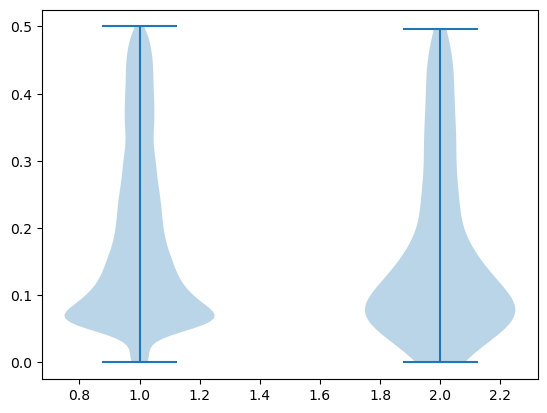

In [50]:
import pandas as pd

levels = ["low","mod", "high"]

df_all = pd.DataFrame()
for l in levels:
    file_path = os.path.expanduser(f'{l}_{cname}_snpeff_freq.txt.frq')
    df1 = pd.read_csv(file_path, delimiter='\t')  # Use delimiter='\t' if the file is tab-separated
    df1[['ref', 'AF1']] = df1['N_CHR'].str.split(':', expand=True)
    df1[['alt', 'AF2']] = df1['{ALLELE:FREQ}'].str.split(':', expand=True)
    df1['MAF'] = df1[['AF1', 'AF2']].min(axis=1)
    df1['MAF'] = df1['MAF'].astype(float)
    df_all = pd.concat([df_all, df1], ignore_index=True)

df_inv = pd.DataFrame()
for l in levels:
    file_path = os.path.expanduser(f'{l}_{cname}_inv_snpeff_freq.txt.frq')
    df1 = pd.read_csv(file_path, delimiter='\t')  # Use delimiter='\t' if the file is tab-separated
    df1[['ref', 'AF1']] = df1['N_CHR'].str.split(':', expand=True)
    df1[['alt', 'AF2']] = df1['{ALLELE:FREQ}'].str.split(':', expand=True)
    df1['MAF'] = df1[['AF1', 'AF2']].min(axis=1)
    df1['MAF'] = df1['MAF'].astype(float)
    df_inv = pd.concat([df_inv, df1], ignore_index=True)

plt.violinplot([df_all["MAF"].tolist(), df_inv["MAF"].tolist()])
stat, p_value = mannwhitneyu(df_all["MAF"].tolist(), df_inv["MAF"].tolist(), alternative='two-sided')
print(p_value)
print(sum(df_all["MAF"].tolist())/len(df_all["MAF"].tolist()))
print(sum(df_inv["MAF"].tolist())/len(df_inv["MAF"].tolist()))